### Try Model: Decision Tree Regression

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *

# Process Nan_Column by dropping them
StartML.nan_columns(nonan_data)

local_kwargs {'data_path_1': './data/train.csv', 'data_path_2': './data/titanic_no_nan.csv', 'data_path_3': './data/test.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


[]

In [2]:
# There are only numeric columns
StartML.idx_columns(nonan_data)

[('Survived', 0, dtype('int64')),
 ('Pclass', 1, dtype('int64')),
 ('Sex', 2, dtype('int64')),
 ('Age', 3, dtype('float64')),
 ('Ticket', 4, dtype('int64')),
 ('Fare', 5, dtype('float64')),
 ('Title', 6, dtype('int64')),
 ('FamilySize', 7, dtype('int64'))]

In [3]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,1,2,0,29.000000,553,10.500,6,0
1,0,2,1,23.000000,119,13.000,5,0
2,0,3,1,28.000000,306,9.500,5,0
3,0,3,1,20.000000,500,9.225,5,0
4,0,1,1,29.699118,13,0.000,5,0


In [4]:
StartMod.feature_scaling(nonan_data).head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,1.0,0.5,0.0,0.359135,0.813235,0.020495,0.750,0.0
1,0.0,0.5,1.0,0.283740,0.175000,0.025374,0.625,0.0
2,0.0,1.0,1.0,0.346569,0.450000,0.018543,0.625,0.0
3,0.0,1.0,1.0,0.246042,0.735294,0.018006,0.625,0.0
4,0.0,0.0,1.0,0.367921,0.019118,0.000000,0.625,0.0


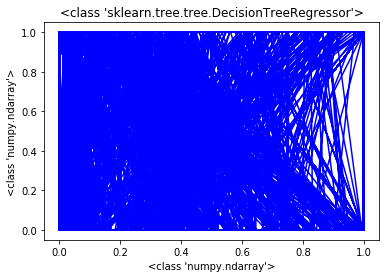

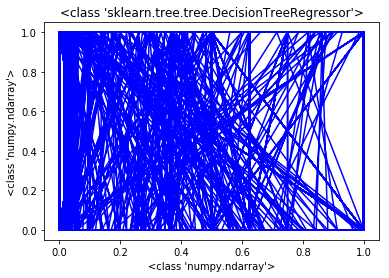

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [5]:
# Choose method Linear Regression to predict the Survivors
reg_dt, y_true, y_predict = StartModSKL.regression_decision_tree(nonan_data, 'Survived')

reg_dt

In [6]:
y_predict

array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.])

In [7]:
# Convert predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([np.round(item) for item in y_predict ])

# Compare the predicted value with true_value
len(y_true), len(y_pred)

(179, 179)

In [8]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.88      0.79      0.83       107
        1.0       0.73      0.83      0.78        72

avg / total       0.82      0.81      0.81       179

Confusion Matrix: 
 [[85 22]
 [12 60]]

Accuracy: 
 0.810055865922

Mean_Squared_Error: 
 0.189944134078


### Result: 
#### the correct predicted result 145, 
#### the wrong predicted result 34